In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdcemz6nl
  JVM stdout: /tmp/tmpdcemz6nl/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdcemz6nl/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_unknownUser_54o8oc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
data_path = "train_data__df2factirize.csv"

# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
df

C1,Hospital_code,Hospital_type_code,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Stay
0,8,0,0,0,0,2,0,0,2,0,5
1,2,0,0,1,0,2,1,0,2,0,45
2,10,1,1,1,1,2,1,0,2,0,35
3,26,2,0,0,2,2,1,0,2,0,45
4,26,2,0,1,2,2,1,0,2,0,45
5,23,3,1,1,0,2,1,0,2,0,15
6,32,4,0,1,3,3,0,0,2,0,5
7,23,3,0,2,0,3,1,0,2,0,45
8,1,5,2,0,3,4,1,0,2,0,55
9,10,1,2,1,1,3,1,0,2,0,35


In [4]:
df = df.drop('C1')
df = df.drop('Visitors_with_Patient')

In [5]:
df.describe()

Rows:318438
Cols:10

,Hospital_code,Hospital_type_code,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,Type_of_Admission,Severity_of_Illness,Age,Stay
type,int,int,int,int,int,int,int,int,int,int
mins,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
mean,18.31884071624619,2.3971887777212513,1.7654394261991337,0.9773174055860168,1.737782551077446,2.6256539734579416,0.782767760129131,1.091537442139443,3.0727991006098527,31.985504242584092
maxs,32.0,6.0,4.0,5.0,5.0,4.0,2.0,2.0,9.0,105.0
sigma,8.633754885795048,1.3685564694895331,0.6644381963300847,0.916655753465455,1.727606555113404,0.8730604938237946,0.6889572206285375,0.6628857004044936,2.2579366824746425,21.50075161139117
zeros,0,45928,28516,127947,112753,0,117676,56723,48514,0
missing,0,0,0,0,0,0,0,0,0,0
0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0
1,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,45.0
2,10.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,35.0


In [6]:
y = "Stay"
x = df.columns
x.remove(y)

In [7]:
aml = H2OAutoML(max_runtime_secs = 1000, seed = 1)
#aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/23
# GBM base models (used / total),5/10
# XGBoost base models (used / total),3/7
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/3
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [8]:
lb = aml.leaderboard

In [9]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20230821_60441,20.2306,409.276,15.0126,0.650522,409.276
StackedEnsemble_AllModels_2_AutoML_1_20230821_60441,20.2319,409.33,15.0132,0.650559,409.33
StackedEnsemble_BestOfFamily_3_AutoML_1_20230821_60441,20.2328,409.366,15.0166,0.650596,409.366
StackedEnsemble_BestOfFamily_4_AutoML_1_20230821_60441,20.2349,409.453,15.018,0.650669,409.453
StackedEnsemble_AllModels_1_AutoML_1_20230821_60441,20.2352,409.464,15.0158,0.650717,409.464
StackedEnsemble_BestOfFamily_2_AutoML_1_20230821_60441,20.2445,409.84,15.0284,0.651138,409.84
GBM_4_AutoML_1_20230821_60441,20.2632,410.597,15.0369,0.651665,410.597
StackedEnsemble_BestOfFamily_1_AutoML_1_20230821_60441,20.2658,410.702,15.0406,0.651452,410.702
GBM_3_AutoML_1_20230821_60441,20.2725,410.973,15.0381,0.651767,410.973
GBM_1_AutoML_1_20230821_60441,20.2749,411.072,15.0411,0.651701,411.072


In [10]:
# Get model ids for all models in the AutoML Leaderboard
#model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#model_ids = list(aml.leaderboard['model_id']).as_data_frame()
model_ids = lb['model_id'].as_data_frame()[1:]
model_ids

[['StackedEnsemble_AllModels_3_AutoML_1_20230821_60441'],
 ['StackedEnsemble_AllModels_2_AutoML_1_20230821_60441'],
 ['StackedEnsemble_BestOfFamily_3_AutoML_1_20230821_60441'],
 ['StackedEnsemble_BestOfFamily_4_AutoML_1_20230821_60441'],
 ['StackedEnsemble_AllModels_1_AutoML_1_20230821_60441'],
 ['StackedEnsemble_BestOfFamily_2_AutoML_1_20230821_60441'],
 ['GBM_4_AutoML_1_20230821_60441'],
 ['StackedEnsemble_BestOfFamily_1_AutoML_1_20230821_60441'],
 ['GBM_3_AutoML_1_20230821_60441'],
 ['GBM_1_AutoML_1_20230821_60441'],
 ['XGBoost_grid_1_AutoML_1_20230821_60441_model_3'],
 ['GBM_2_AutoML_1_20230821_60441'],
 ['XGBoost_3_AutoML_1_20230821_60441'],
 ['XGBoost_grid_1_AutoML_1_20230821_60441_model_1'],
 ['GBM_5_AutoML_1_20230821_60441'],
 ['GBM_grid_1_AutoML_1_20230821_60441_model_3'],
 ['XRT_1_AutoML_1_20230821_60441'],
 ['XGBoost_2_AutoML_1_20230821_60441'],
 ['GBM_grid_1_AutoML_1_20230821_60441_model_1'],
 ['GBM_grid_1_AutoML_1_20230821_60441_model_2'],
 ['XGBoost_grid_1_AutoML_1_202308

In [11]:
#best_model = h2o.get_model('StackedEnsemble_AllModels_2_AutoML_1_20230819_61459')

In [12]:
# Load data into H2O
test = h2o.import_file("test_data__df2factirize.csv")


# Get AutoML object by `project_name`
ml_leader = aml.leader
# Predict with top model from AutoML Leaderboard on a H2OFrame called 'test'
predict_test = ml_leader.predict(test)
predict_test

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
36.2865
33.0873
51.0938
42.4149
30.805
47.6271
48.9067
40.0077
51.0786
46.0174


In [13]:
h2o.download_csv(predict_test, "df2factorize_predict_test.csv")

'/home/jupyter/df2factorize_predict_test.csv'

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20230821_60441,18.8055,353.646,13.8027,0.607807,353.646,10781,0.004939,DRF
XGBoost_grid_1_AutoML_1_20230821_60441_model_2,19.3304,373.666,14.3219,0.624869,373.666,9764,0.002368,XGBoost
XGBoost_1_AutoML_1_20230821_60441,19.4156,376.966,14.4064,0.627251,376.966,9102,0.001949,XGBoost
StackedEnsemble_BestOfFamily_2_AutoML_1_20230821_60441,19.7053,388.298,14.6076,0.6361,388.298,979,0.012382,StackedEnsemble
XRT_1_AutoML_1_20230821_60441,19.7176,388.785,14.5859,0.636182,388.785,9414,0.005868,DRF
StackedEnsemble_BestOfFamily_4_AutoML_1_20230821_60441,19.7378,389.58,14.629,0.636766,389.58,1122,0.017806,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230821_60441,19.7407,389.694,14.6342,0.636903,389.694,1183,0.018066,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230821_60441,19.7457,389.892,14.6348,0.637038,389.892,1225,0.025363,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230821_60441,19.7462,389.912,14.6366,0.637042,389.912,2826,0.036175,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230821_60441,19.7518,390.133,14.6404,0.637177,390.133,1237,0.023375,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

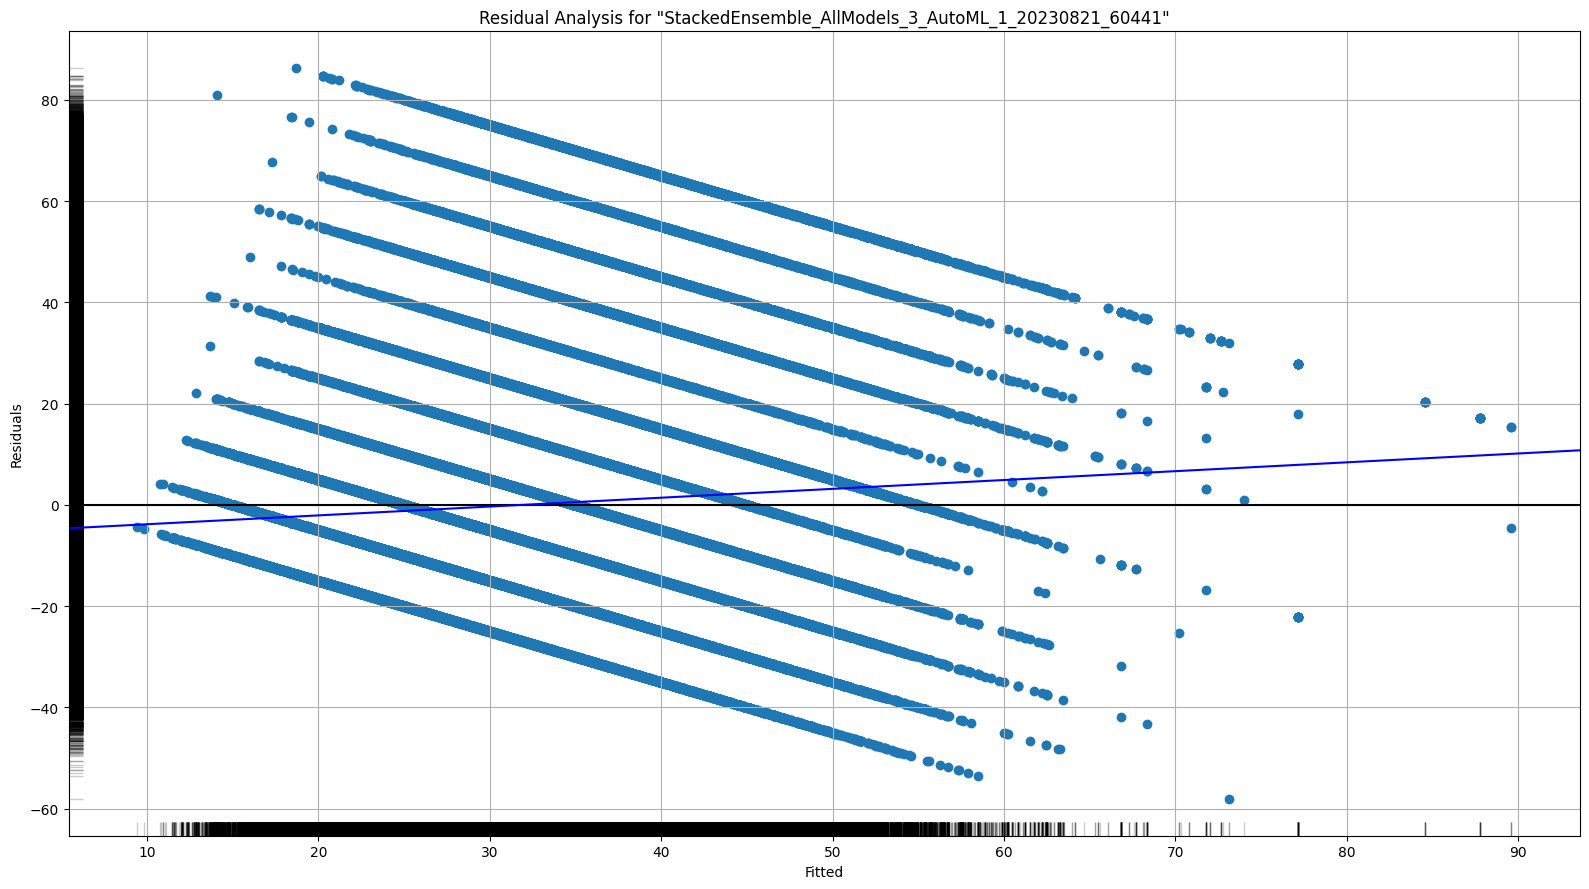

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

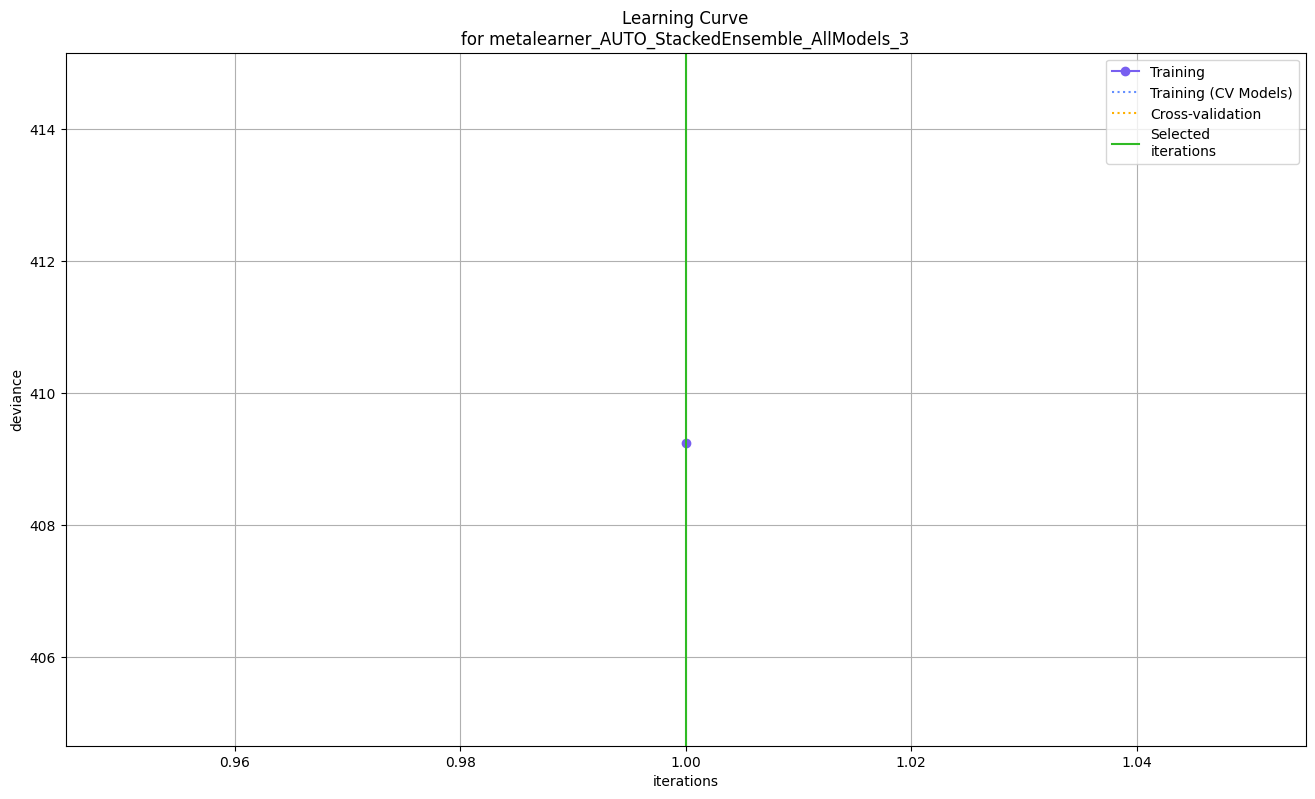

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

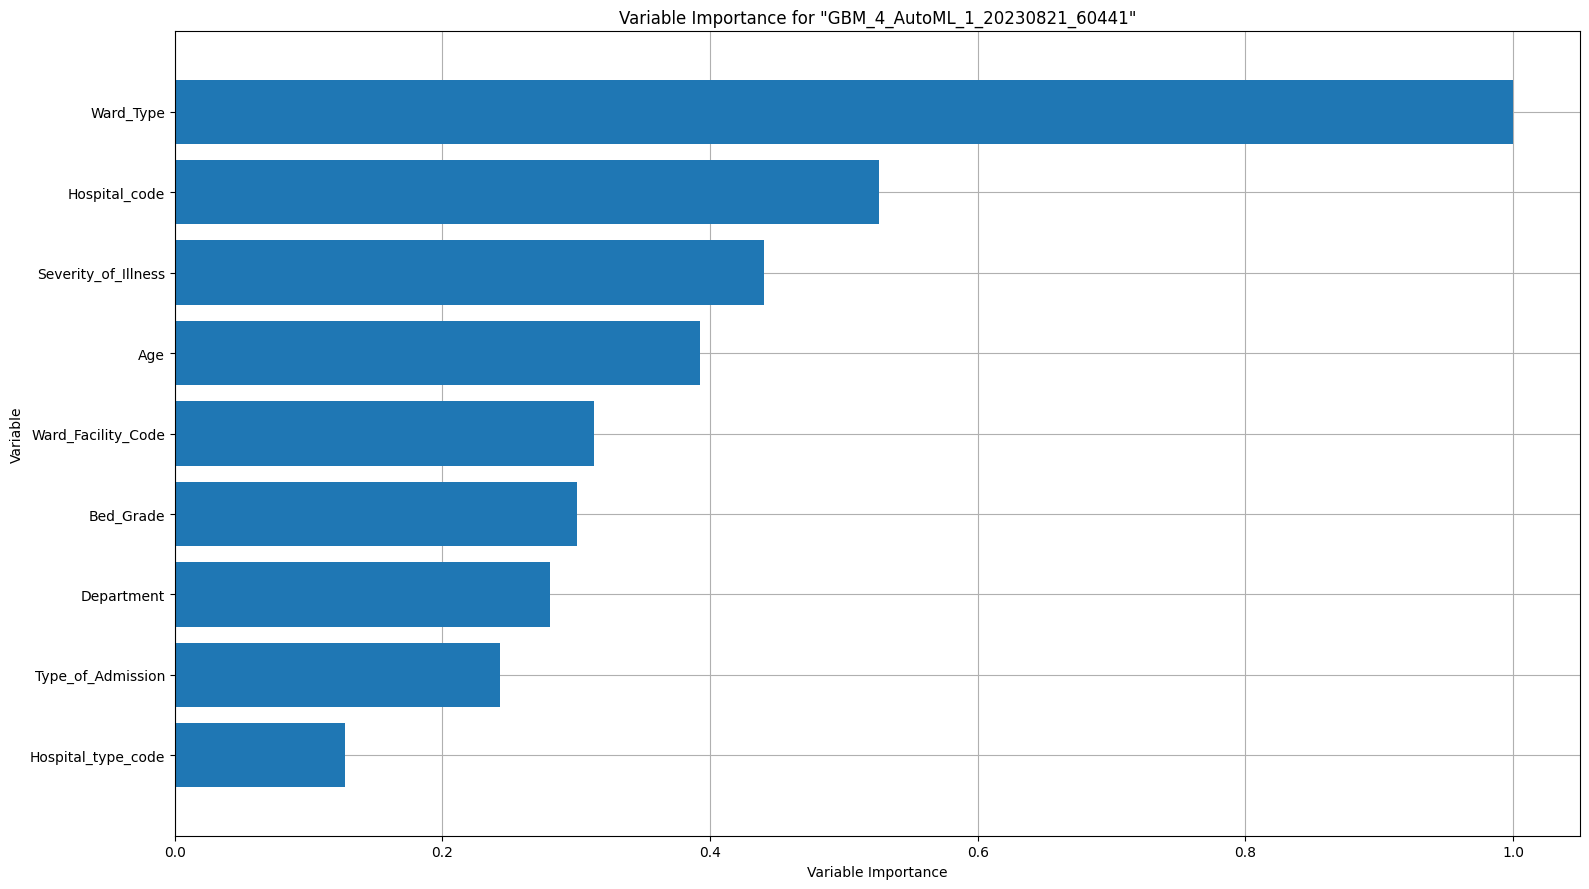

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

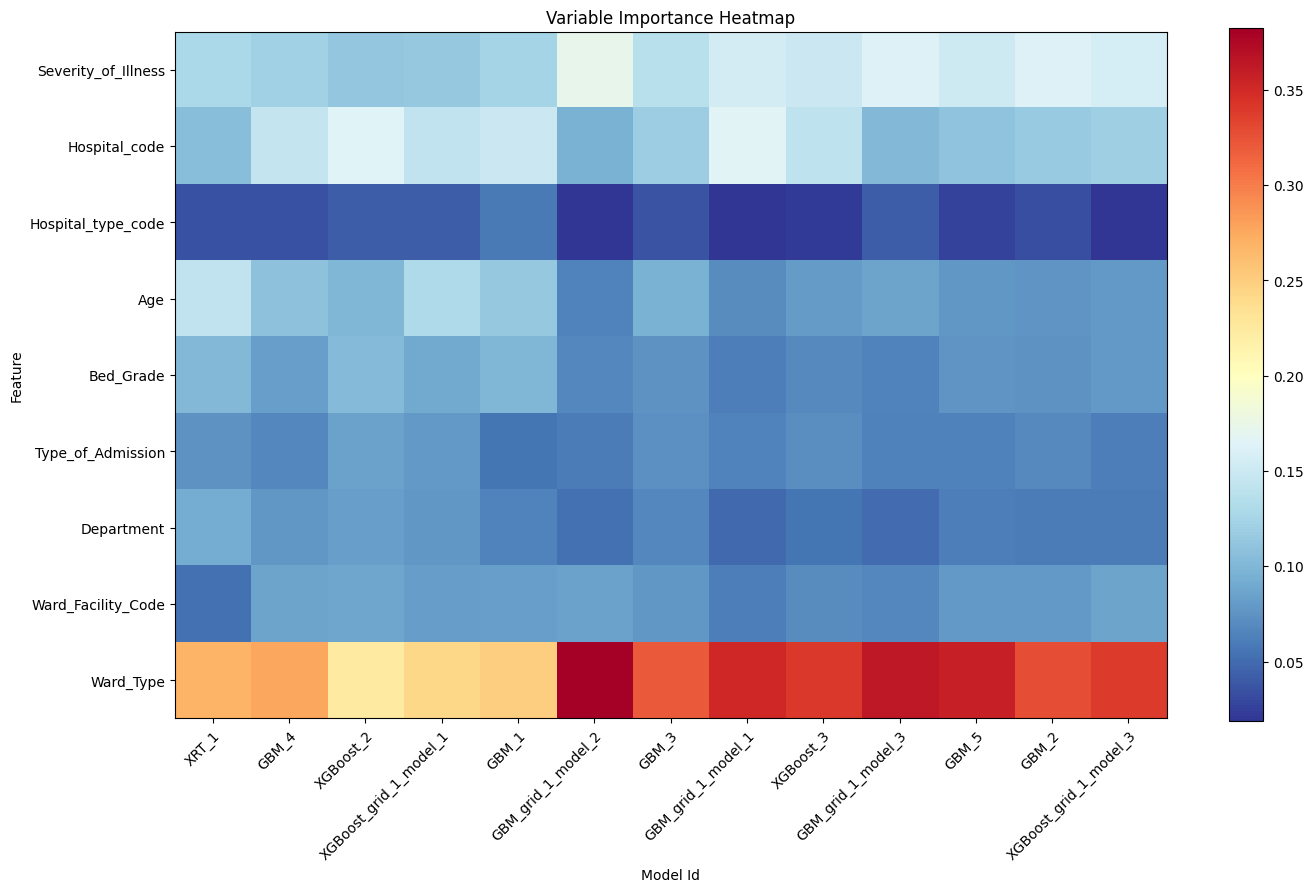

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

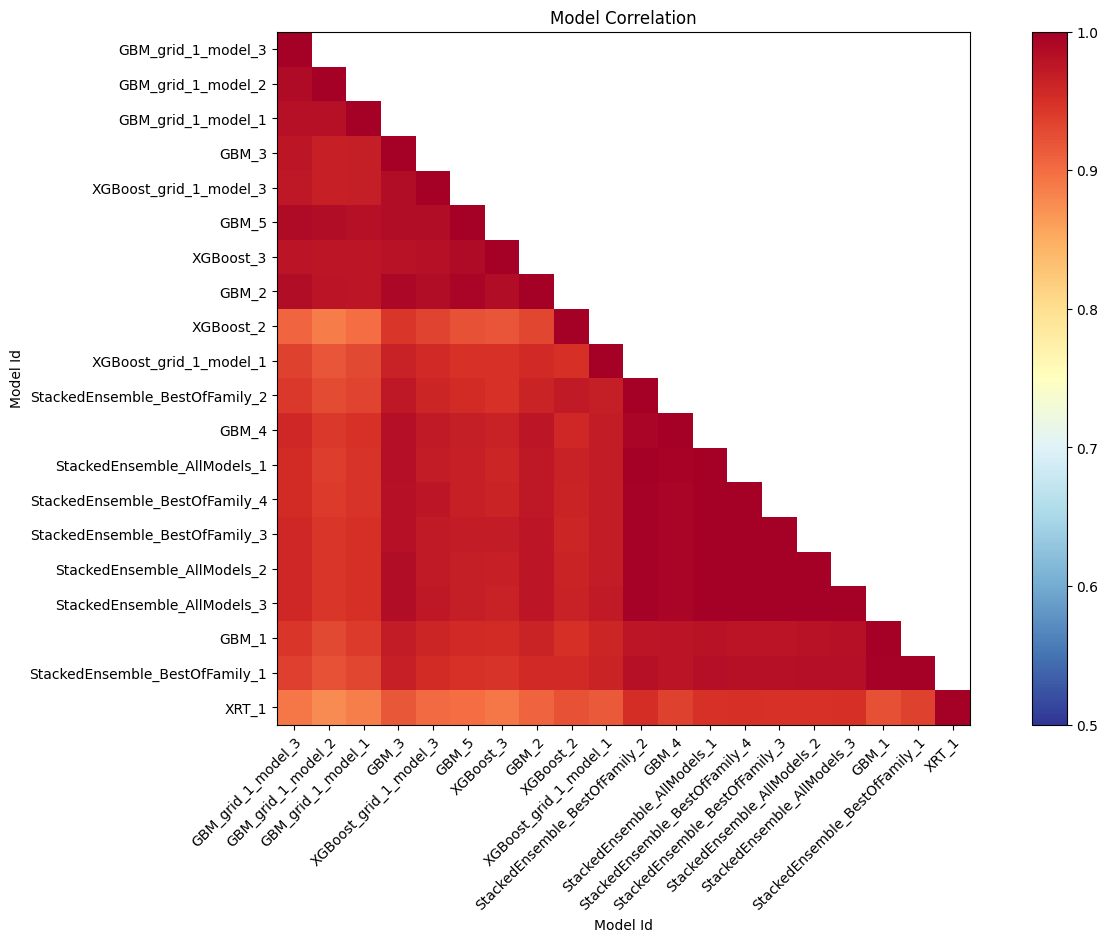

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

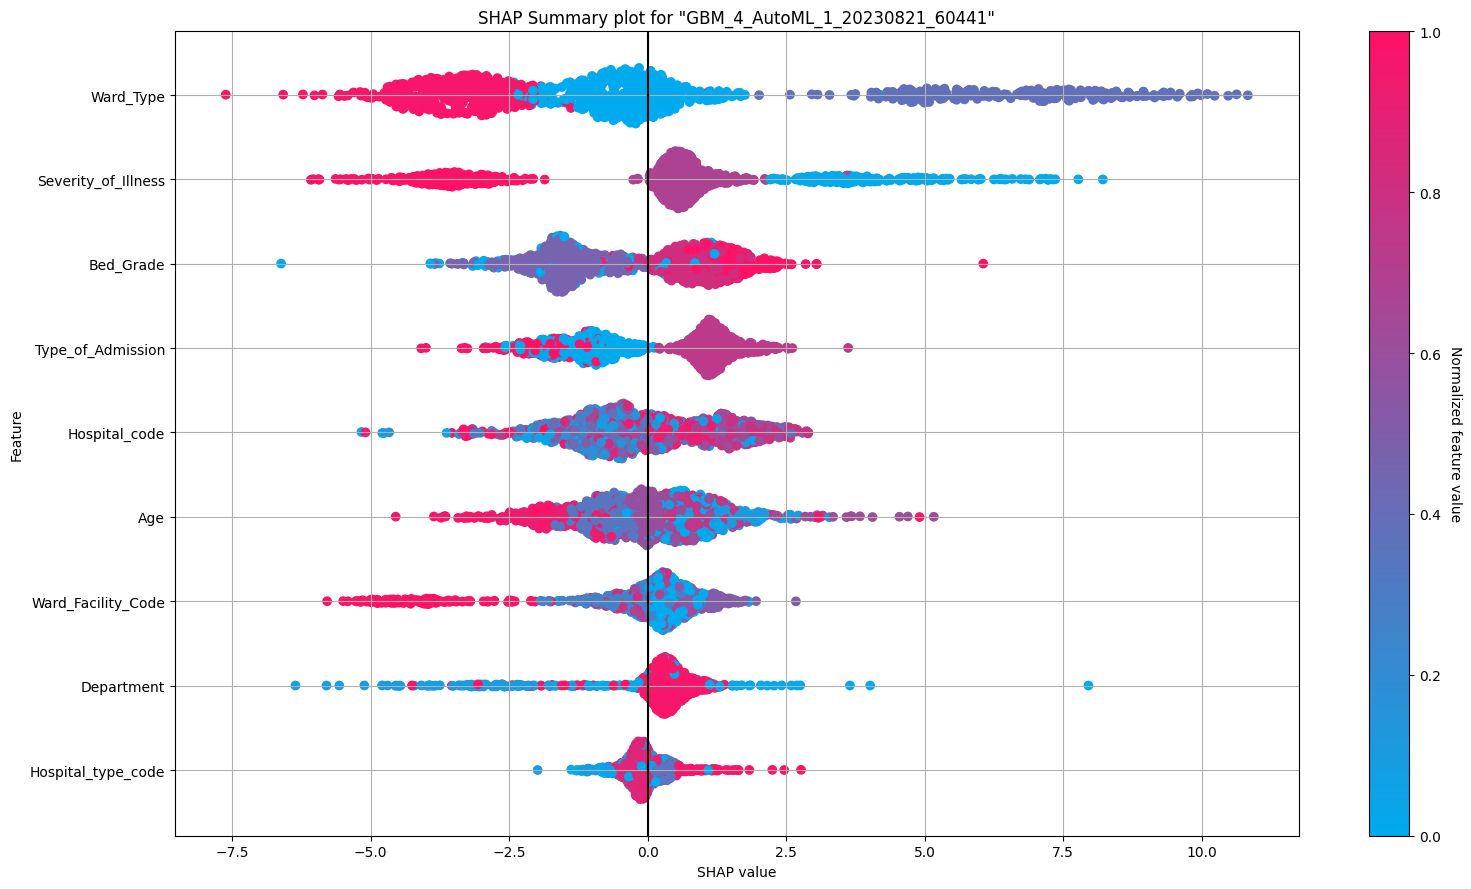

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

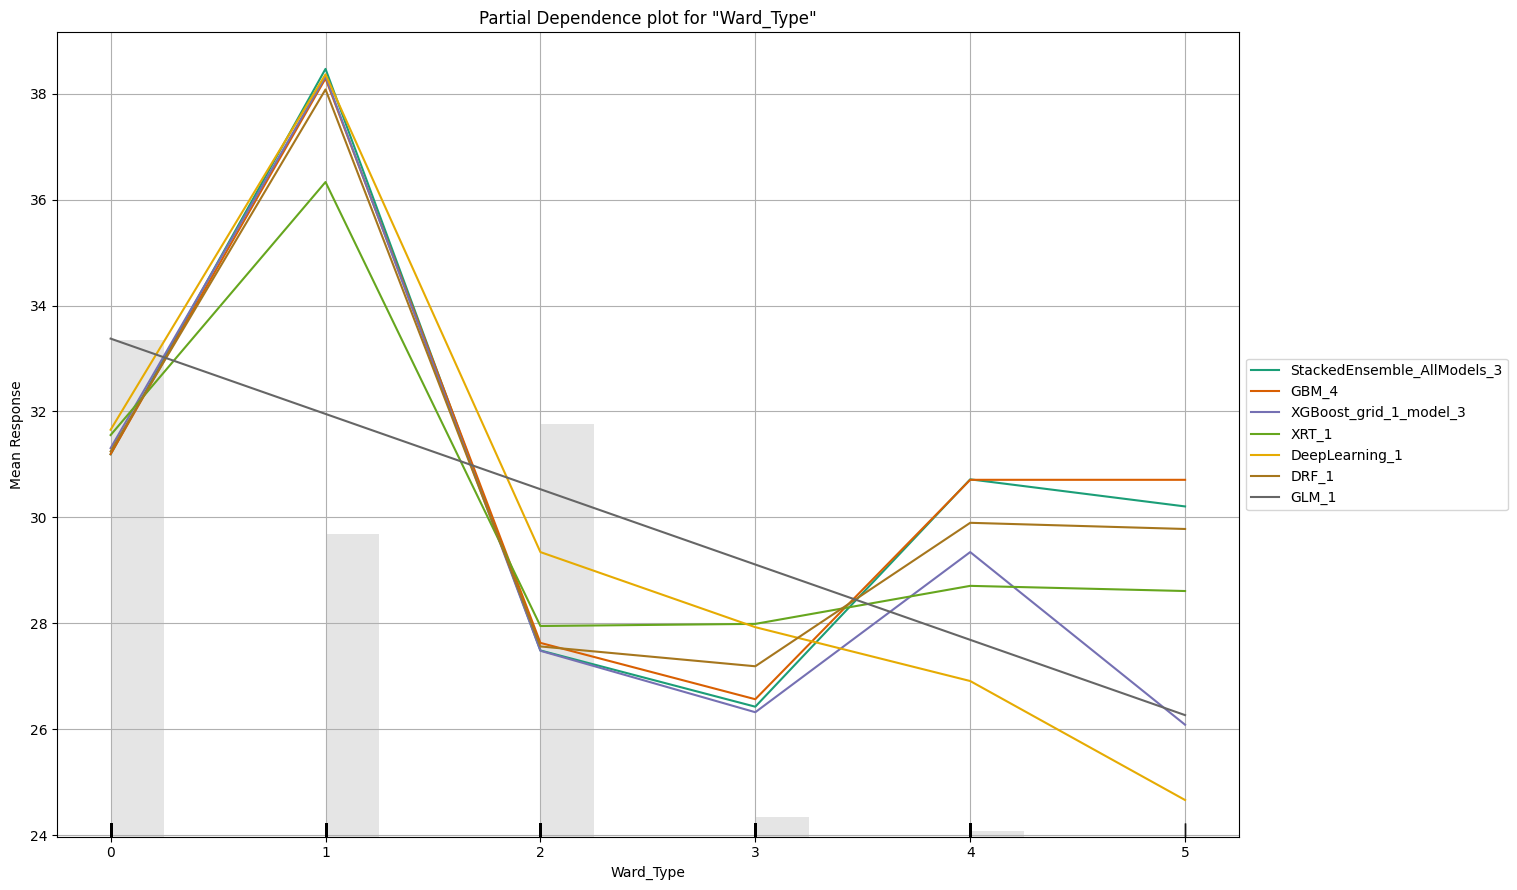

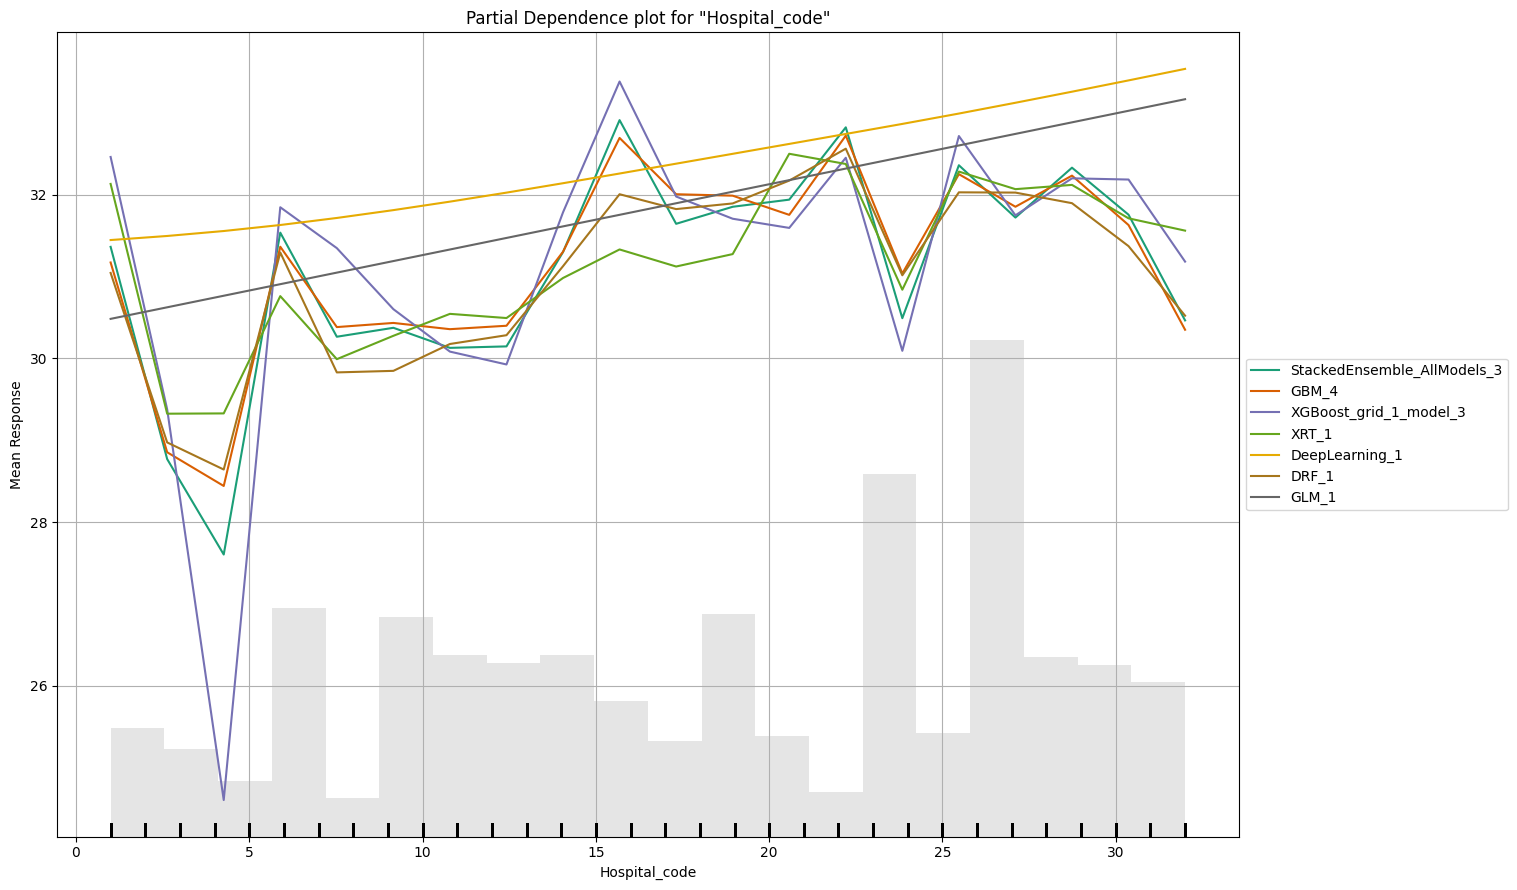

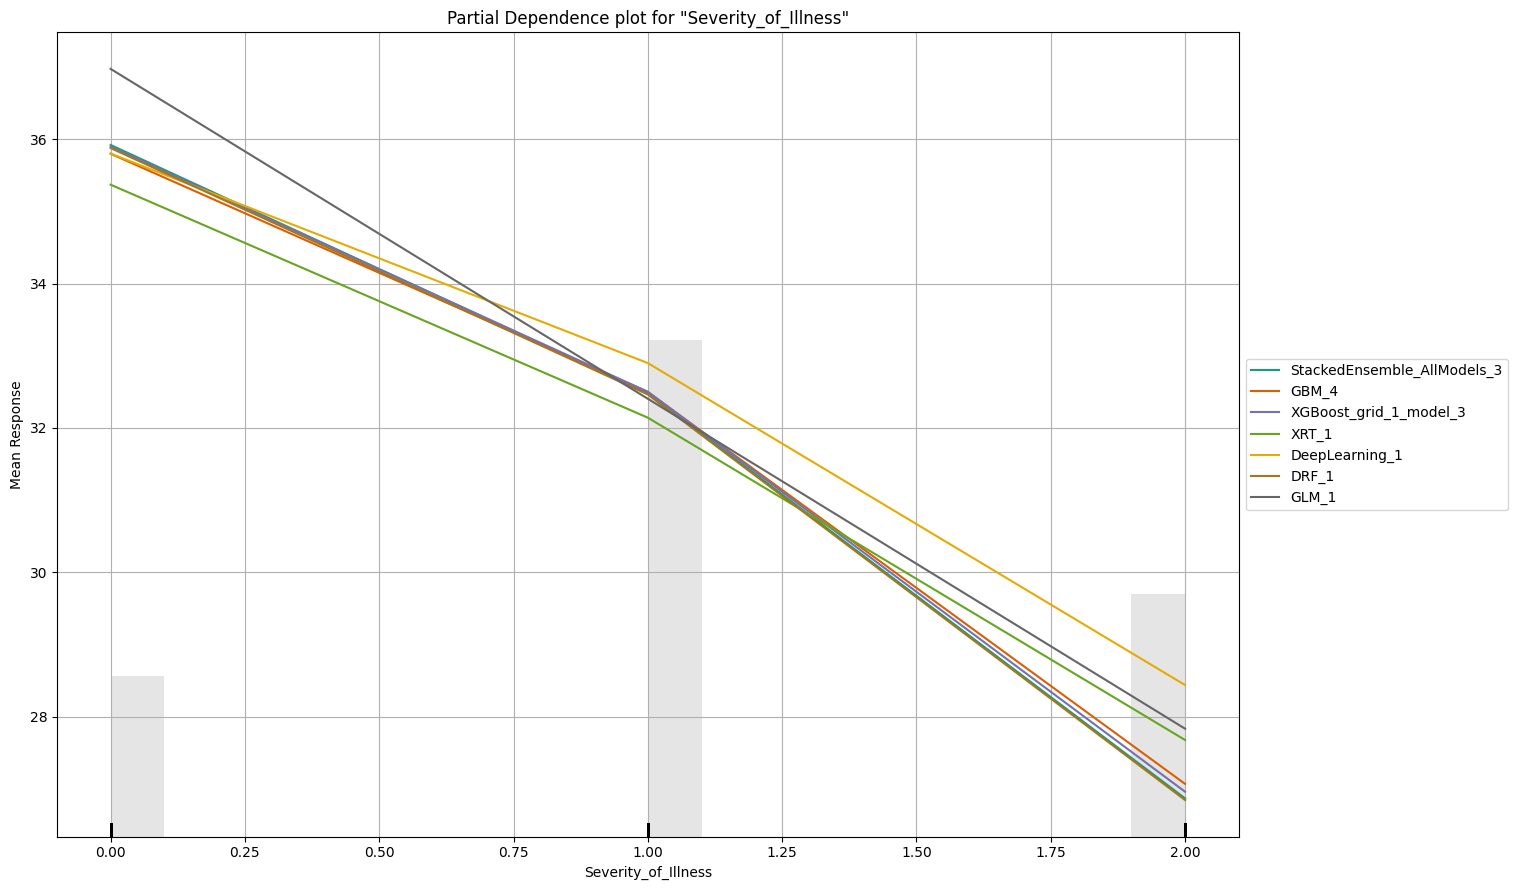

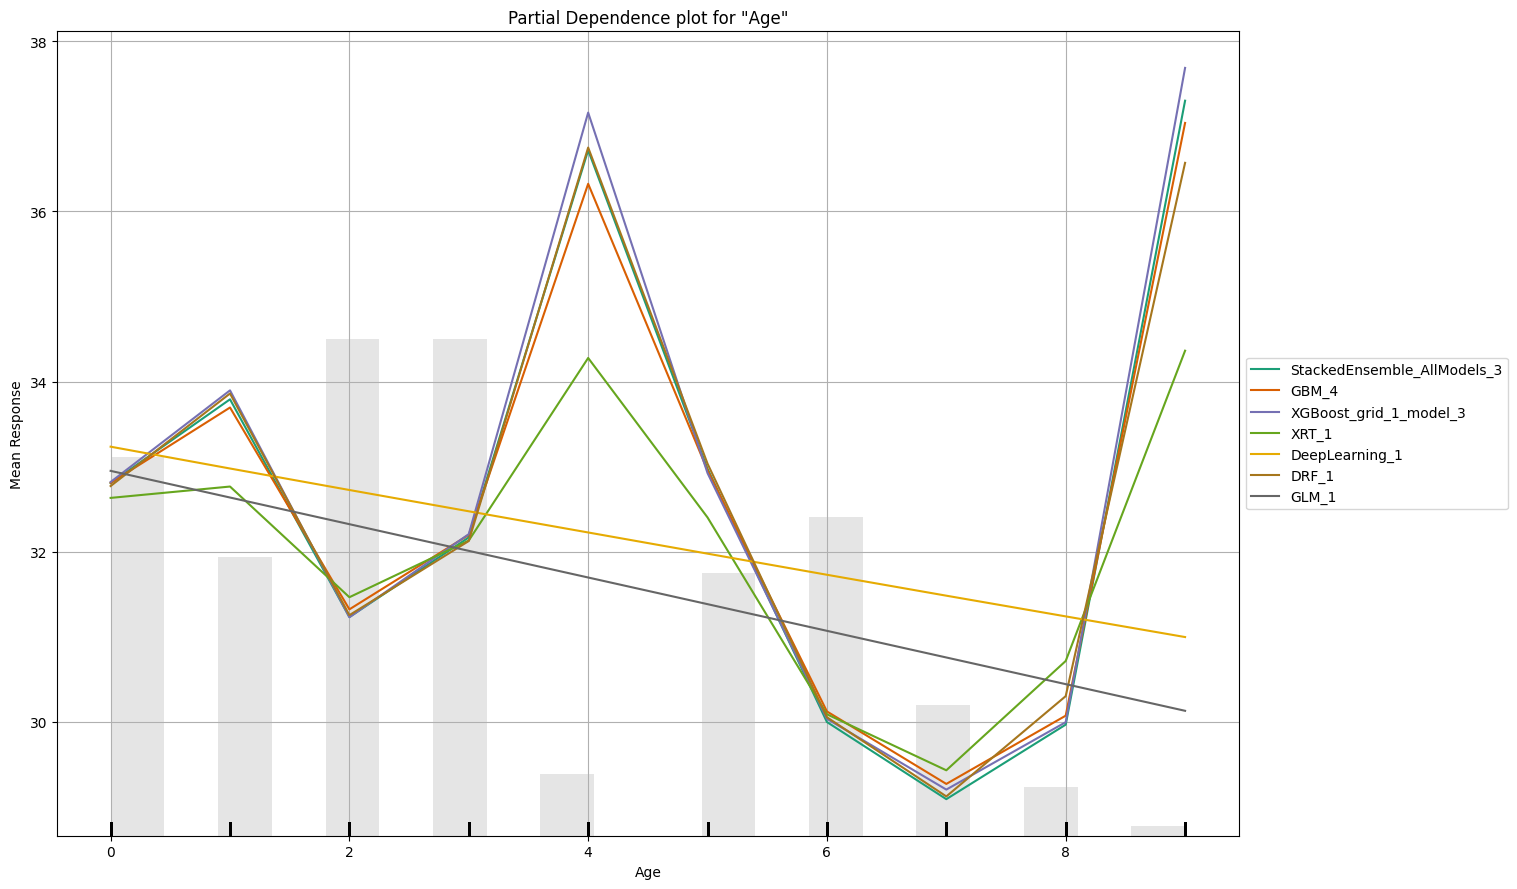

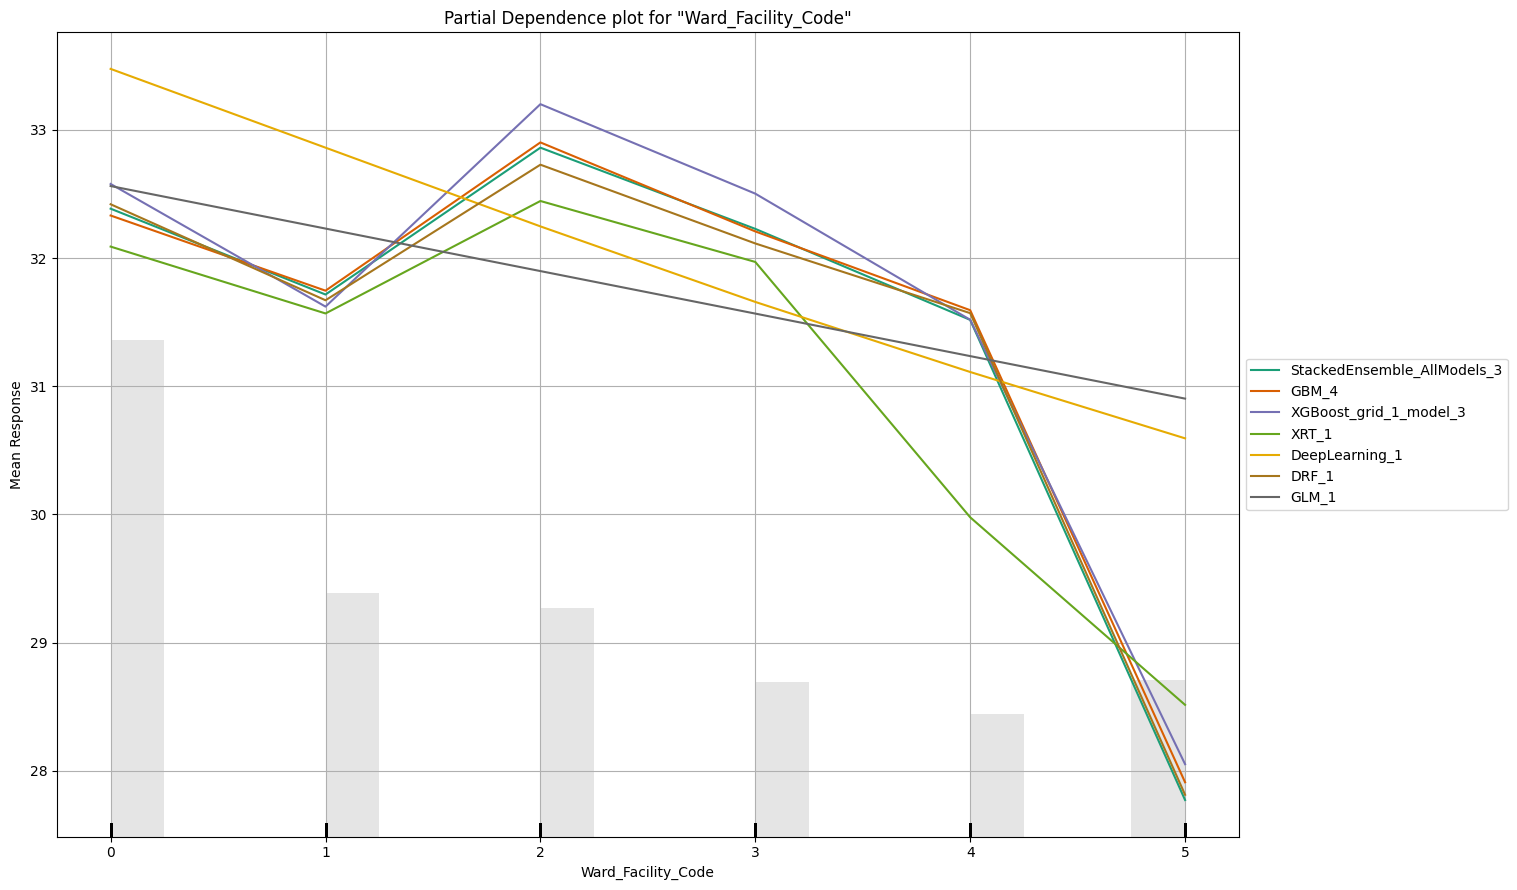

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

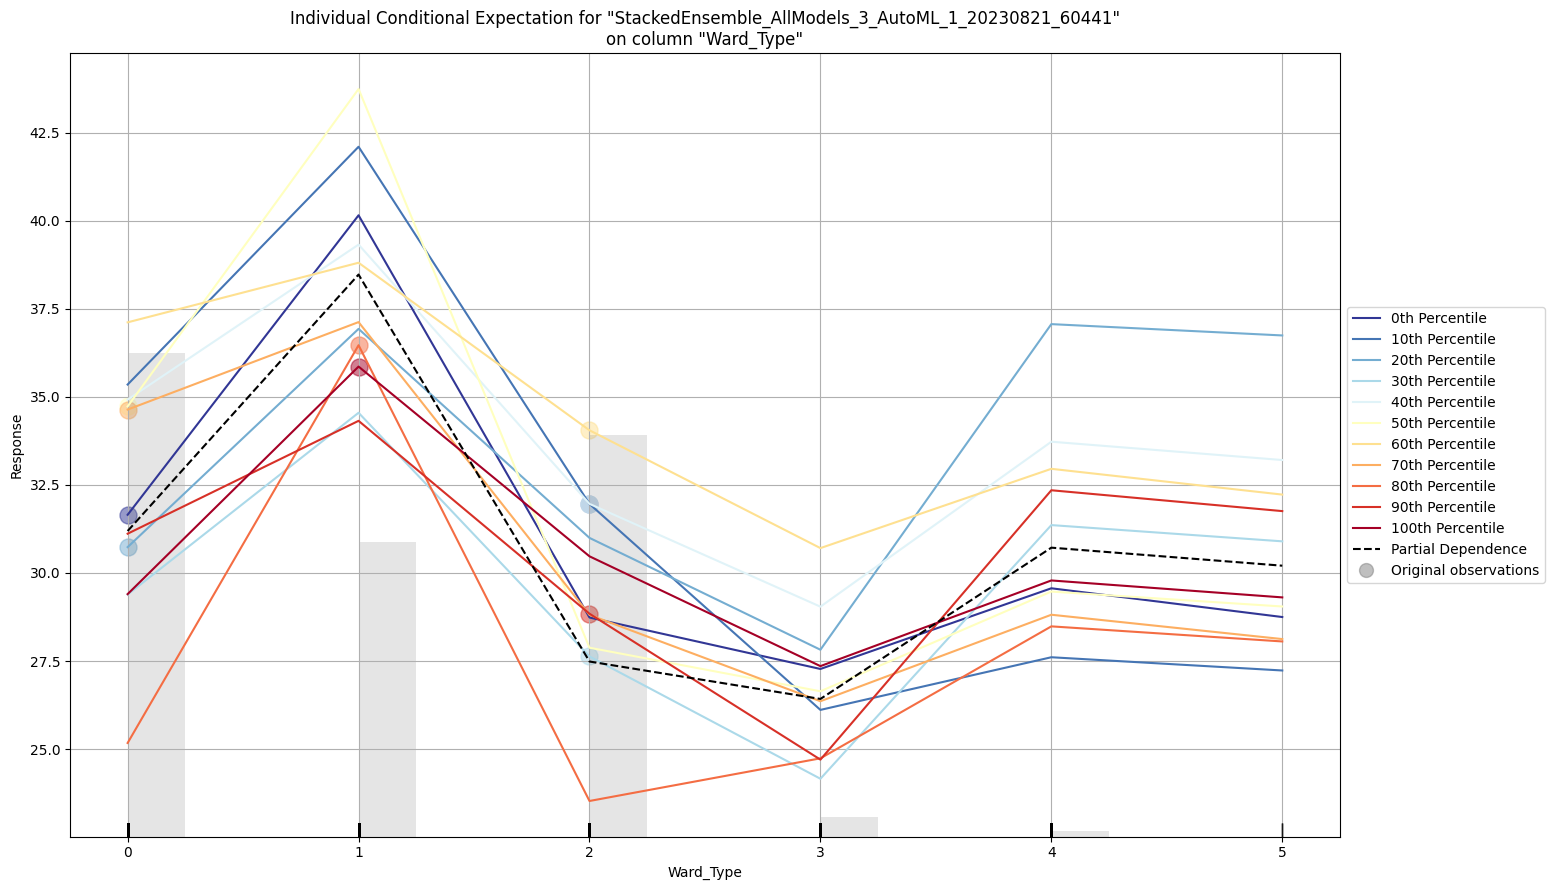

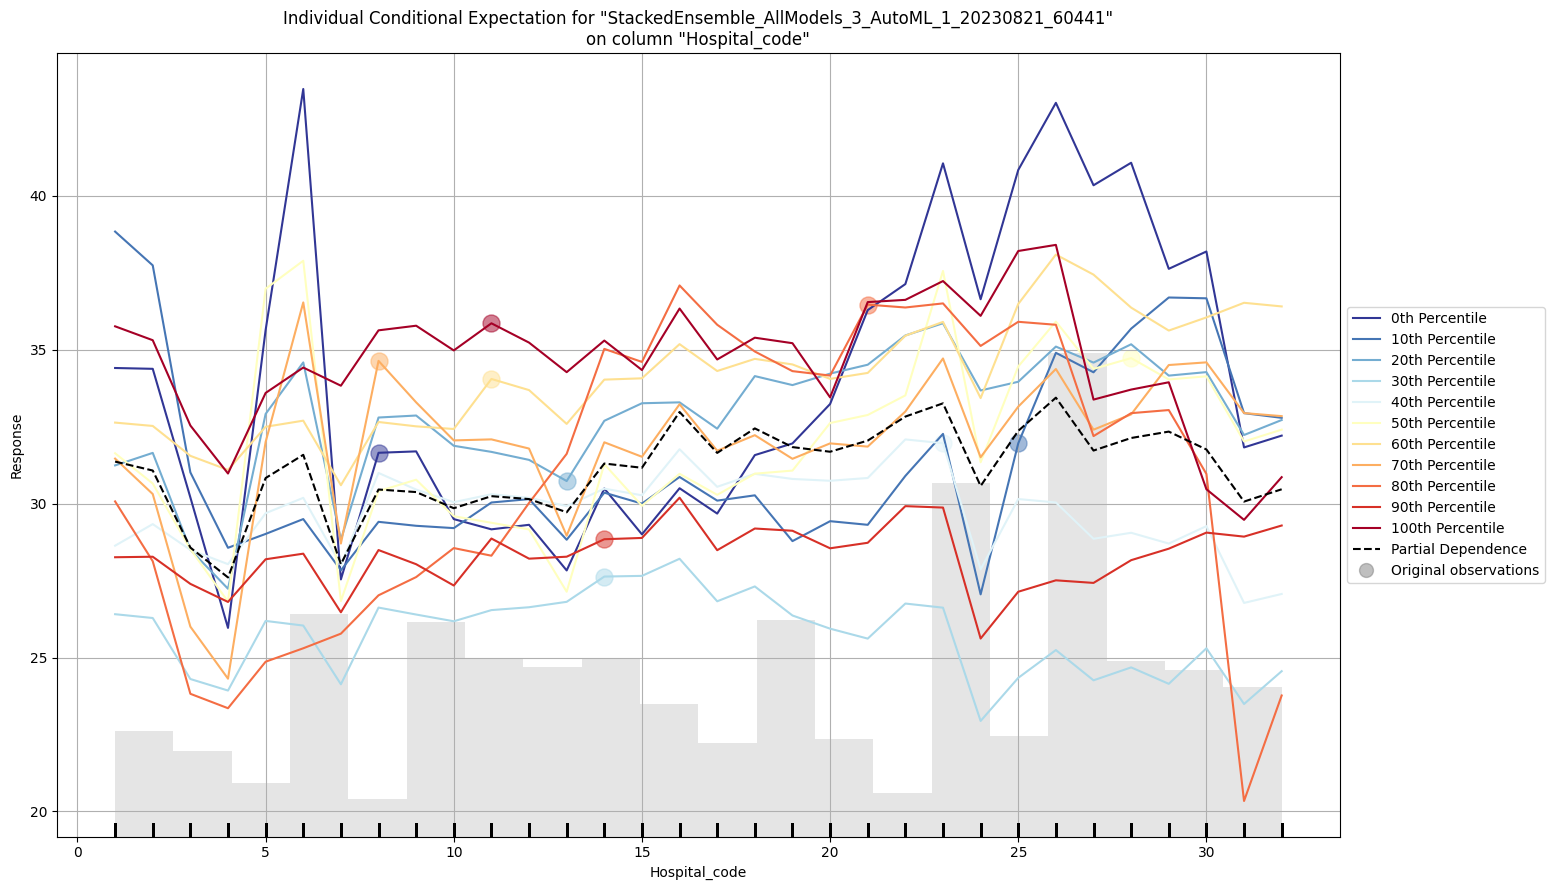

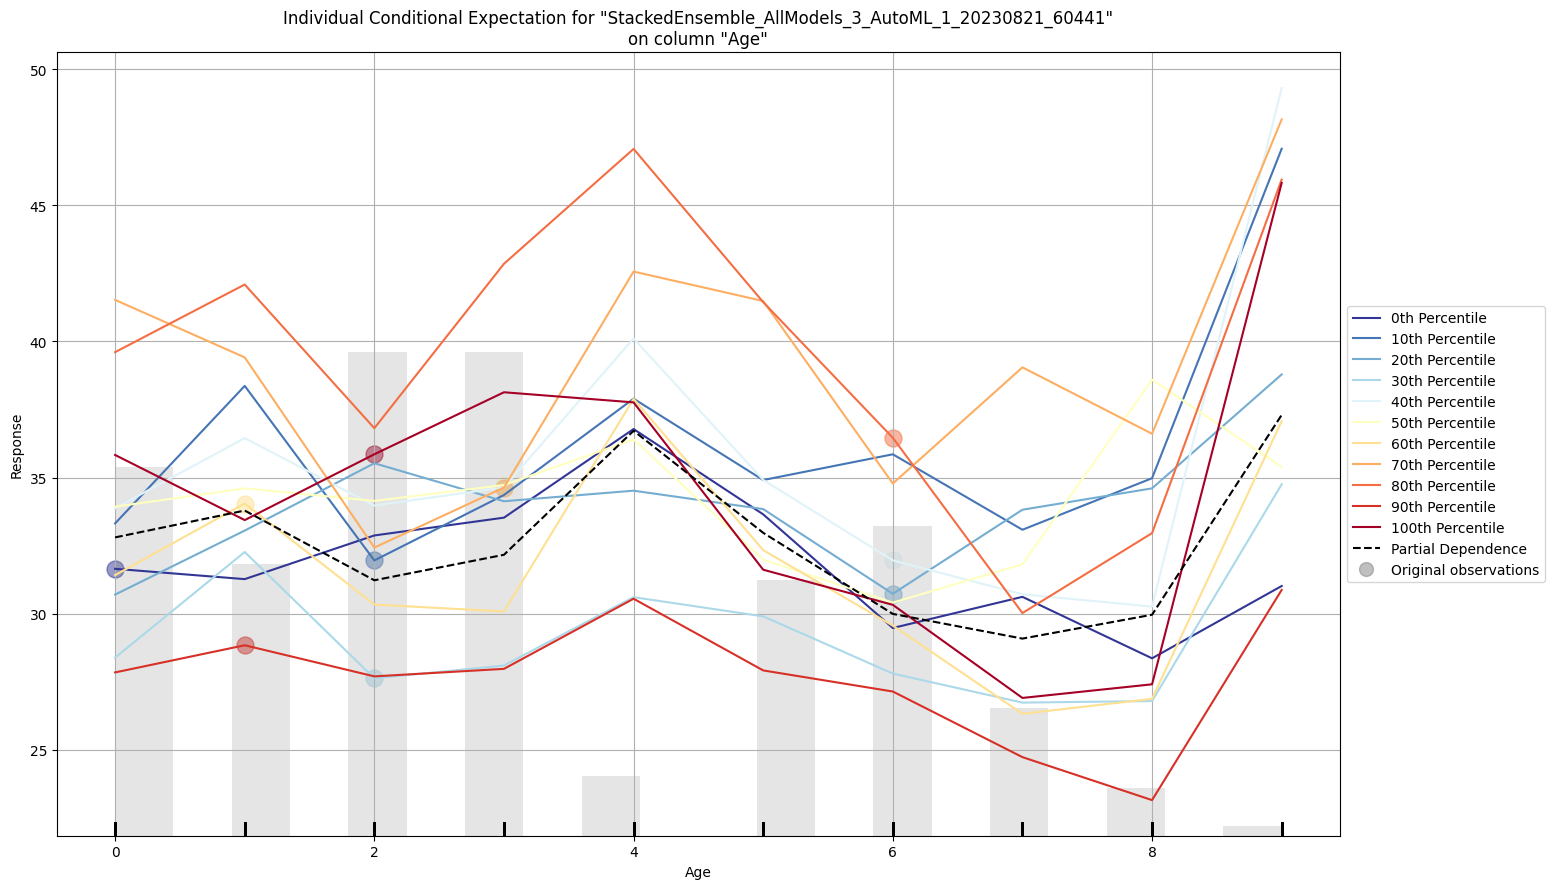

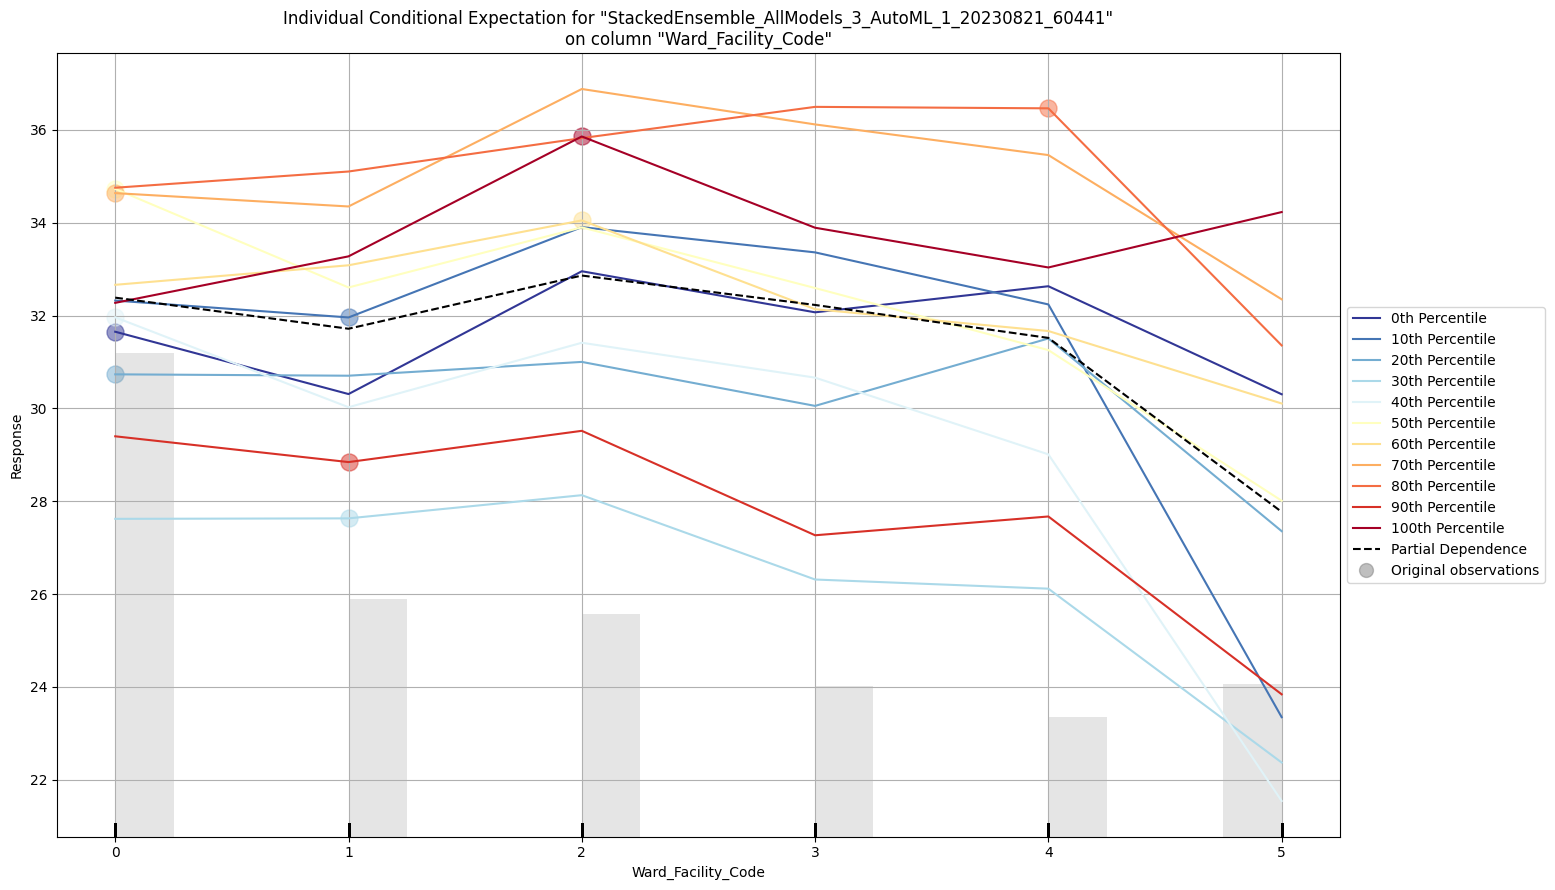

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20230821_60441,18.8055,353.646,13.8027,0.607807,353.646,10781,0.004939,DRF
XGBoost_grid_1_AutoML_1_20230821_60441_model_2,19.3304,373.666,14.3219,0.624869,373.666,9764,0.002368,XGBoost
XGBoost_1_AutoML_1_20230821_60441,19.4156,376.966,14.4064,0.627251,376.966,9102,0.001949,XGBoost
StackedEnsemble_BestOfFamily_2_AutoML_1_20230821_60441,19.7053,388.298,14.6076,0.6361,388.298,979,0.012382,StackedEnsemble
XRT_1_AutoML_1_20230821_60441,19.7176,388.785,14.5859,0.636182,388.785,9414,0.005868,DRF
StackedEnsemble_BestOfFamily_4_AutoML_1_20230821_60441,19.7378,389.58,14.629,0.636766,389.58,1122,0.017806,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230821_60441,19.7407,389.694,14.6342,0.636903,389.694,1183,0.018066,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230821_60441,19.7457,389.892,14.6348,0.637038,389.892,1225,0.025363,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230821_60441,19.7462,389.912,14.6366,0.637042,389.912,2826,0.036175,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230821_60441,19.7518,390.133,14.6404,0.637177,390.133,1237,0.023375,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [14]:
aml.explain(df)

In [15]:
perf = aml.leader.model_performance(test)
perf.auc()

AttributeError: 'NoneType' object has no attribute 'auc'

In [ ]:
%matplotlib inline
metalearner.std_coef_plot()

In [ ]:
h2o.save_model(aml.leader, path = "./")
#h2o.save_model(aml.leader, path = "./product_backorders_model_bin")

In [ ]:
ml_leader = aml.leader

In [ ]:
ml_leader.varimp_plot()

In [ ]:
ml_leader.confusion_matrix()